# This notebook is mainly used for Applied Data Science Capstone Project of IBM Data Science Professional Certificate offered by Coursera.

# 1. Business Problem:

Statistics reveal that road accidents are extremely common. According to Budget Direct, a market giant in insurance in Australia, the global average of road fatalities is 18.2 deaths per 100000 people with a rate of 3 deaths daily. The impact of the road accidents greatly impacts on the society in terms of the lives lost and properties destroyed. In this regard, recent years has been critical in determining the factors that leads to accidents on road. With the development of scalable data mining techniques and tools, exploring the capability of analysing real-world large data sets to model car accidents is gaining extreme attention.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print("Hello Capstone Project Course!")

# 2. Describe Data
USA records 10.6 deaths per 100000. In this study we analyse historical road accident data from the department of Police in the City of Seattle. The data details information on nearly .2 million car accidents collected for more than 15 years from Jan-2004 to Sept-2019. The data set contains 37 characteristics related to each of the accidents. 

In [4]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [52]:
df_data_1.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


The data contains 194,673 rows of data.

# 3. METHODOLOGY
## 3.1 Cleansing Data

We intutively make a selection of attributes that may relate to car accidents. Then we create a new dataframe that contains by dropping all unrelated/unslected attributes as below. 

In [53]:
df_car_accidents = df_data_1[["SEVERITYCODE", "ADDRTYPE", "WEATHER", "ROADCOND", "VEHCOUNT", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "LIGHTCOND", "SPEEDING", "HITPARKEDCAR", "JUNCTIONTYPE"]]
df_car_accidents.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,LIGHTCOND,SPEEDING,HITPARKEDCAR,JUNCTIONTYPE
0,2,Intersection,Overcast,Wet,2,2,0,0,Daylight,NaN,N,At Intersection (intersection related)
1,1,Block,Raining,Wet,2,2,0,0,Dark - Street Lights On,NaN,N,Mid-Block (not related to intersection)
2,1,Block,Overcast,Dry,3,4,0,0,Daylight,NaN,N,Mid-Block (not related to intersection)
3,1,Block,Clear,Dry,3,3,0,0,Daylight,NaN,N,Mid-Block (not related to intersection)
4,2,Intersection,Raining,Wet,2,2,0,0,Daylight,NaN,N,At Intersection (intersection related)


In [54]:
df_car_accidents.count(0)

SEVERITYCODE    194673
ADDRTYPE        192747
WEATHER         189592
ROADCOND        189661
VEHCOUNT        194673
PERSONCOUNT     194673
PEDCOUNT        194673
PEDCYLCOUNT     194673
LIGHTCOND       189503
SPEEDING          9333
HITPARKEDCAR    194673
JUNCTIONTYPE    188344
dtype: int64

Besides, by counting nun-null values in each selected attribute column we see that speeding, column has a significantly higher number of missing values ((i.e. missing over 180000 values)). Therefore, we regardless of its high relation to car accidents should be removed to avoid its potential undesirable impact to the predictions. 

In [55]:
df_car_accidents.drop("SPEEDING", axis=1, inplace=True)
df_car_accidents.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,LIGHTCOND,HITPARKEDCAR,JUNCTIONTYPE
0,2,Intersection,Overcast,Wet,2,2,0,0,Daylight,N,At Intersection (intersection related)
1,1,Block,Raining,Wet,2,2,0,0,Dark - Street Lights On,N,Mid-Block (not related to intersection)
2,1,Block,Overcast,Dry,3,4,0,0,Daylight,N,Mid-Block (not related to intersection)
3,1,Block,Clear,Dry,3,3,0,0,Daylight,N,Mid-Block (not related to intersection)
4,2,Intersection,Raining,Wet,2,2,0,0,Daylight,N,At Intersection (intersection related)


In [56]:
df_car_accidents.shape

(194673, 11)

In [57]:
# Drop null values and unknown values (present in ROADCOND and WEATHER columns)

df_car_accidents.dropna(axis=0,inplace=True)
# df.dropna(subset=['WEATHER'],axis=0,inplace=True)
# df.dropna(subset=['COLLISIONTYPE'],axis=0,inplace=True)
# df.dropna(subset=['ROADCOND'],axis=0,inplace=True)
# df.dropna(subset=['VEHCOUNT'],axis=0,inplace=True)
# df.dropna(subset=['PERSONCOUNT'],axis=0,inplace=True)

df_car_accidents = df_car_accidents[df_car_accidents['ROADCOND'] != 'Unknown']
df_car_accidents = df_car_accidents[df_car_accidents['WEATHER'] != 'Unknown']
df_car_accidents.shape


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(170033, 11)

### The 194673 data rows is reduced to 170033 data rows after cleaning the data by addressing missing and unknown values 

## 3.2 Exploratory Data Analysis

Text(0, 0.5, '# Accidents')

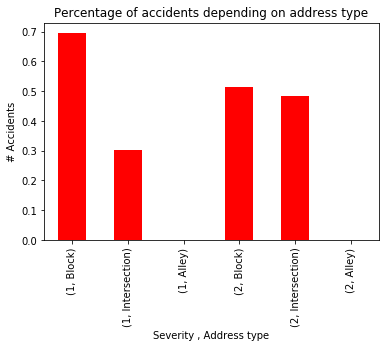

In [58]:
#Number of accidents for address type
df_car_accidents.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accidents depending on address type')
plt.xlabel('Severity , Address type')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

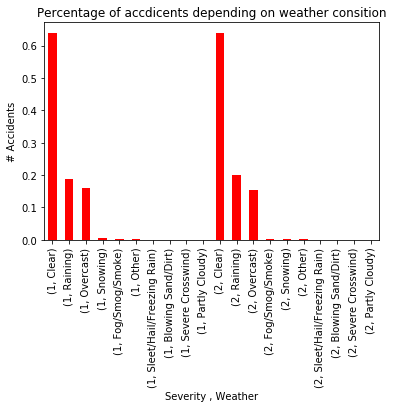

In [59]:
#Number of accidents for weather
df_car_accidents.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on weather consition')
plt.xlabel('Severity , Weather')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

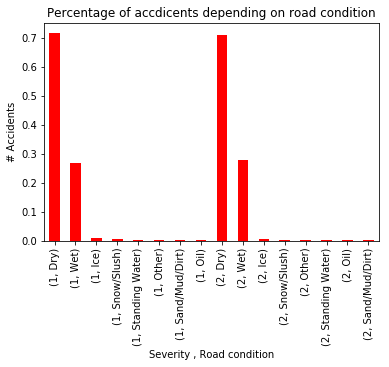

In [60]:
#Number of accidents for Road condition
df_car_accidents.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on road condition')
plt.xlabel('Severity , Road condition')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

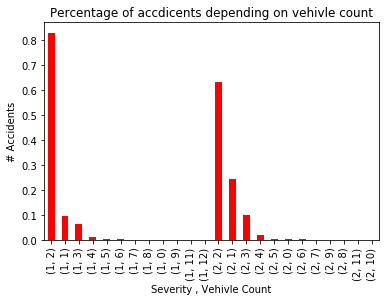

In [61]:
#Number of accidents for vehivle count
df_car_accidents.groupby(['SEVERITYCODE'])['VEHCOUNT'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on vehivle count')
plt.xlabel('Severity , Vehivle Count')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

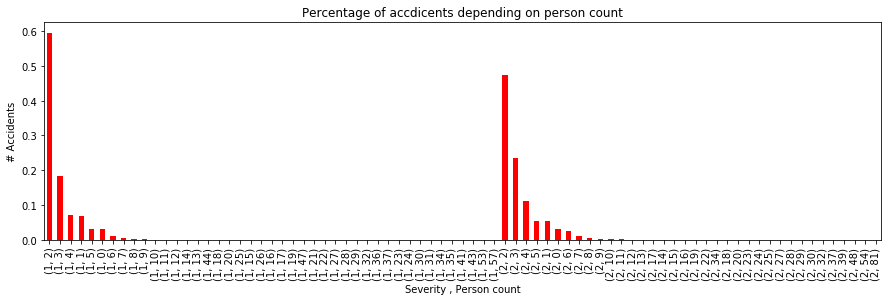

In [62]:
#Number of accidents for Person count
plt.figure(figsize=(15,4))
df_car_accidents.groupby(['SEVERITYCODE'])['PERSONCOUNT'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on person count')
plt.xlabel('Severity , Person count')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

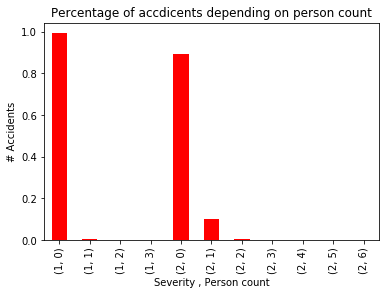

In [63]:
#Number of accidents for Person count

df_car_accidents.groupby(['SEVERITYCODE'])['PEDCOUNT'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on person count')
plt.xlabel('Severity , Person count')
plt.ylabel('# Accidents')


Text(0, 0.5, '# Accidents')

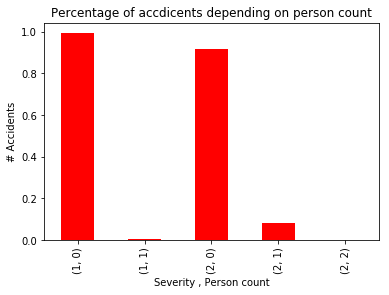

In [64]:
#Number of accidents for Person count
df_car_accidents.groupby(['SEVERITYCODE'])['PEDCYLCOUNT'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on person count')
plt.xlabel('Severity , Person count')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

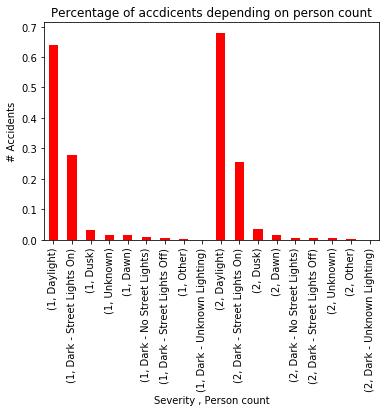

In [65]:
#Number of accidents for Person count

df_car_accidents.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on person count')
plt.xlabel('Severity , Person count')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

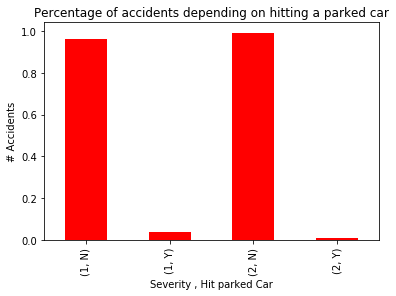

In [66]:
df_car_accidents.groupby(['SEVERITYCODE'])['HITPARKEDCAR'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accidents depending on hitting a parked car')
plt.xlabel('Severity , Hit parked Car')
plt.ylabel('# Accidents')

Text(0, 0.5, '# Accidents')

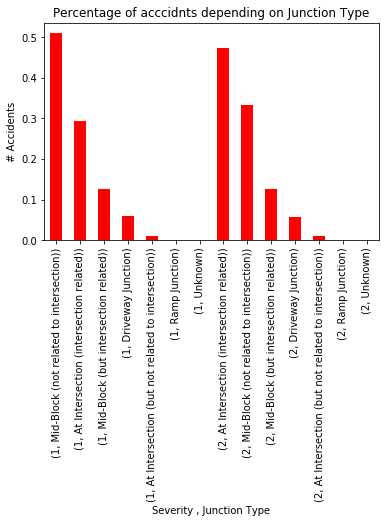

In [67]:
df_car_accidents.groupby(['SEVERITYCODE'])['JUNCTIONTYPE'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of acccidnts depending on Junction Type')
plt.xlabel('Severity , Junction Type')
plt.ylabel('# Accidents')

### Based on out Feature Analysis above we conclude each of the attribute above has a correlation to the severity of a car accident ranging from stronger to comparatively weaker relationships. 
We however employ all of above attributes in model traning.

## 3.3 Data Preparation for Prediction
It is required to convert the categorical variables to numerical values before applying prediction methods. We implement one hot encoding.

In [68]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [69]:
new_df = df_car_accidents

list_cate_features = ['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'JUNCTIONTYPE']
for cate_feature in list_cate_features:
    new_df = encode_and_bind(new_df, cate_feature)
    
new_df.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,LIGHTCOND,HITPARKEDCAR,...,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown
0,2,Intersection,Overcast,Wet,2,2,0,0,Daylight,N,...,0,1,0,0,1,0,0,0,0,0
1,1,Block,Raining,Wet,2,2,0,0,Dark - Street Lights On,N,...,0,1,0,0,0,0,0,1,0,0
2,1,Block,Overcast,Dry,3,4,0,0,Daylight,N,...,0,1,0,0,0,0,0,1,0,0
3,1,Block,Clear,Dry,3,3,0,0,Daylight,N,...,0,1,0,0,0,0,0,1,0,0
4,2,Intersection,Raining,Wet,2,2,0,0,Daylight,N,...,0,1,0,0,1,0,0,0,0,0


In [70]:
new_df.drop("ADDRTYPE", axis=1, inplace=True)
new_df.drop("WEATHER", axis=1, inplace=True)
new_df.drop("ROADCOND", axis=1, inplace=True)
new_df.drop("LIGHTCOND", axis=1, inplace=True)
new_df.drop("HITPARKEDCAR", axis=1, inplace=True)
new_df.drop("JUNCTIONTYPE", axis=1, inplace=True)

new_df.head()

,SEVERITYCODE,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown
0,2,2,2,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,2,2,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,3,4,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,3,3,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,2,2,2,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


## 3.4 Modeling and Prediction
We develop a logistic regressionmodel to predict the severity of car accidents.

In [73]:
from sklearn import preprocessing
df_features = new_df.drop('SEVERITYCODE', axis=1)
X = df_features
X = preprocessing.StandardScaler().fit(X).transform(X)
y = new_df['SEVERITYCODE'].values

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [74]:

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)


from sklearn.metrics import jaccard_similarity_score
yhat_LR = LR.predict(X_test)
print('Jaccard for LR is:', jaccard_similarity_score(y_test, yhat_LR))

Train set: (136026, 43) (136026,)
Test set: (34007, 43) (34007,)
Jaccard for LR is: 0.7262328344164437


# 4. Results

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_LR, labels=[1,2]))

[[22176   550]
 [ 8760  2521]]


Confusion matrix, without normalization
[[22176   550]
 [ 8760  2521]]
              precision    recall  f1-score   support

           1       0.72      0.98      0.83     22726
           2       0.82      0.22      0.35     11281

   micro avg       0.73      0.73      0.73     34007
   macro avg       0.77      0.60      0.59     34007
weighted avg       0.75      0.73      0.67     34007



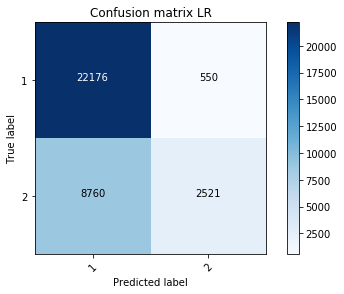

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix LR')
print (classification_report(y_test, yhat_LR))

The confusion matrix above shows the accuracy of our model in predicting the severity of car accidents. Our model hs an accuracy of 72% accuracy of correctly predicting Severity Category 1 accidents and 82% accuracy in correctly predicting Severity Catergory 2 accidents.

# 5. Discussion

We have remove important factors such as speeding in the analysis due to undesirable missing data which should have been considered if the good quality data was present. From the analysis, we have figured out Weather, Road Condition,  Collision Type, Number of Persons and Number of Vehicles involved contribute to high severity of car accidents involving people injuries than the rest of the features used for the analysis. Our analysis of road conditions and roas types is enormously helpful for authorities to identify where accidents tend to be more severe andaccordinly install more instruction boards, road signs and bend mirrors or even implement new rules and regulation as needed. 

# 6. Conclusion
Today Data mining plays a vital role in decision making in diversified technological and non technological fields. In this project we have analyzed the historical data set that records nearly .2 million car accidents over 15 years in Seattle, USA. The records contain several characteristics that support the severity of the accident. By employing supervised Machine Learning techniques for data classification we have shown that the severity of a given car getting in to an accident can be predicted in real-time with 77% accuracy on avarage. The analysis can be useful for driver recommendation systems as well as for authorities to implement efficient procedures to minimize accidents and their severity.